In [1]:
import pandas as pd
df = pd.read_excel("D:\Excelr\Data Science\Data Science Assignment\Association Rules\Association Rules\Online retail.xlsx")
# missing values
missing_values = df.isnull().sum()
# Drop rows with missing values
df_cleaned = df.dropna()
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()
# Split the single column of transactions into lists of items
df_cleaned['Transaction'] = df_cleaned[df_cleaned.columns[0]].apply(lambda x: x.split(','))
# Display information after preprocessing
missing_values, df_cleaned.head()

(shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
 dtype: int64,
   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  \
 0                             burgers,meatballs,eggs                                                                                                                                                                                
 1                                            chutney                                                                                                                                                                                
 2                                     turkey,avocado            

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# Load and preprocess data
df_cleaned = df.dropna().drop_duplicates()
df_cleaned['Transaction'] = df_cleaned[df.columns[0]].apply(lambda x: x.split(','))
# TransactionEncoder to transform the list of items into a one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(df_cleaned['Transaction']).transform(df_cleaned['Transaction'])
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_filtered = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 1)]

print(frequent_itemsets.head())
print(rules_filtered.head())

    support     itemsets
0  0.029179    (almonds)
1  0.045797    (avocado)
2  0.020483  (black tea)
3  0.045024   (brownies)
4  0.113816    (burgers)
    antecedents      consequents  antecedent support  consequent support  \
2     (burgers)           (eggs)            0.113816            0.208116   
11    (burgers)  (mineral water)            0.113816            0.299710   
21       (cake)  (mineral water)            0.103575            0.299710   
31    (chicken)  (mineral water)            0.083865            0.299710   
51  (chocolate)  (mineral water)            0.205217            0.299710   

     support  confidence      lift  leverage  conviction  zhangs_metric  
2   0.036135    0.317487  1.525531  0.012448    1.160248       0.388735  
11  0.034589    0.303905  1.013996  0.000477    1.006026       0.015576  
21  0.037681    0.363806  1.213859  0.006639    1.100749       0.196538  
31  0.032657    0.389401  1.299258  0.007522    1.146890       0.251415  
51  0.073237    0.35687

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdoc

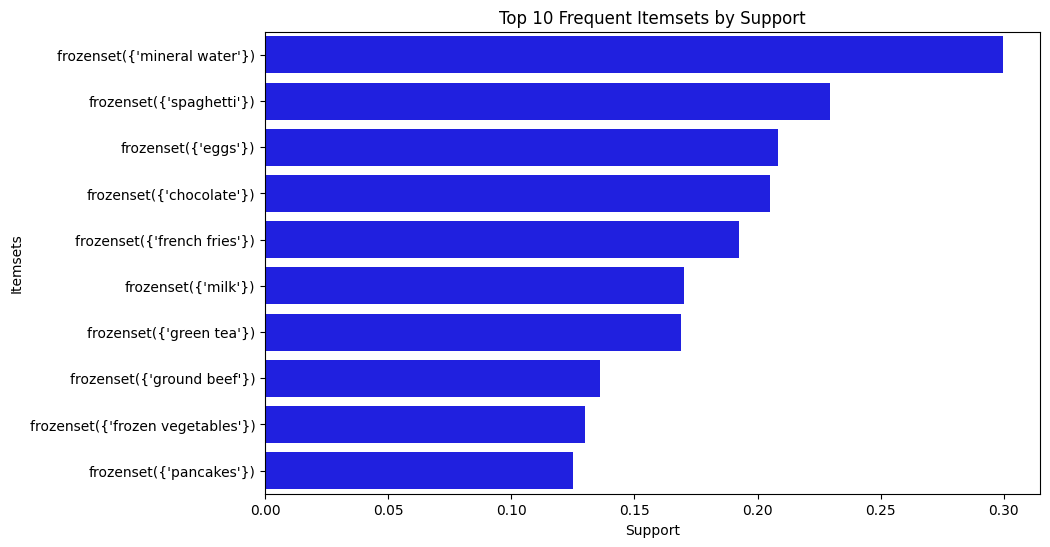

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


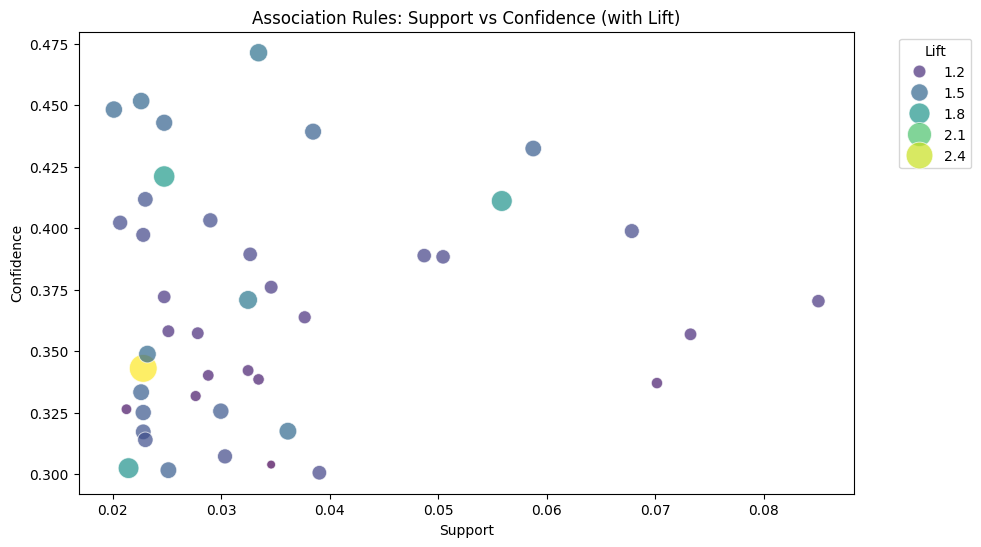

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Frequent Itemsets (Top 10 by Support)
top_itemsets = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_itemsets, color='blue')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Visualization 2: Association Rules Scatter Plot (Support vs Confidence vs Lift)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules_filtered, hue='lift', palette='viridis', sizes=(40, 400), alpha=0.7)
plt.title('Association Rules: Support vs Confidence (with Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()